# Pandas with Time Series Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from datetime import datetime

In [5]:
my_year = 1987
my_month = 6
my_day = 17
my_hour = 6
my_minutes = 35
my_seconds = 35

In [6]:
my_date = datetime(my_year,my_month,my_day)

In [7]:
my_date

datetime.datetime(1987, 6, 17, 0, 0)

In [8]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minutes,my_seconds)

In [9]:
my_date_time

datetime.datetime(1987, 6, 17, 6, 35, 35)

In [10]:
type(my_date)

datetime.datetime

In [11]:
my_date.ctime

<function datetime.ctime()>

In [12]:
my_date.day

17

In [13]:
first_two_date = [datetime(2010,2,2), datetime(2020,2,2)]

In [14]:
first_two_date

[datetime.datetime(2010, 2, 2, 0, 0), datetime.datetime(2020, 2, 2, 0, 0)]

In [15]:
cols = ['a','b']

In [16]:
dt_ind = pd.DatetimeIndex(first_two_date) # inorder to have dates as an index in the dataframe.

In [17]:
dt_ind

DatetimeIndex(['2010-02-02', '2020-02-02'], dtype='datetime64[ns]', freq=None)

In [18]:
data = np.random.randn(2,2)

In [19]:
data

array([[ 0.70915188, -0.9395517 ],
       [ 0.25150852, -0.46223362]])

In [20]:
df = pd.DataFrame(data, dt_ind, cols)

In [21]:
df # index starts at 0.

,a,b
2010-02-02,0.709152,-0.939552
2020-02-02,0.251509,-0.462234


In [22]:
df.describe

<bound method NDFrame.describe of                    a         b
2010-02-02  0.709152 -0.939552
2020-02-02  0.251509 -0.462234>

In [23]:
df.index.argmax()

np.int64(1)

In [24]:
df.index.max()

Timestamp('2020-02-02 00:00:00')

# Time Resampling

In [26]:
df = pd.read_csv('WMT.csv', index_col='Date', parse_dates=True)  # advisable when the data is in the expected format already.

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-16,57.099998,57.419998,56.639999,56.680000,44.899456,11780800
2011-11-17,56.540001,57.189999,56.259998,56.730000,44.939064,10223800
2011-11-18,57.029999,57.360001,56.610001,57.230000,45.335129,8982300
2011-11-21,56.930000,57.290001,56.380001,56.660000,44.883606,9932200
2011-11-22,56.560001,57.130001,56.500000,56.849998,45.034107,7497300


In [28]:
df.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-11-16   57.099998   57.419998   56.639999   56.680000   44.899456   
2011-11-17   56.540001   57.189999   56.259998   56.730000   44.939064   
2011-11-18   57.029999   57.360001   56.610001   57.230000   45.335129   
2011-11-21   56.930000   57.290001   56.380001   56.660000   44.883606   
2011-11-22   56.560001   57.130001   56.500000   56.849998   45.034107   
...                ...         ...         ...         ...         ...   
2021-11-09  149.520004  149.869995  148.869995  149.789993  149.789993   
2021-11-10  148.729996  149.619995  147.979996  148.440002  148.440002   
2021-11-11  148.770004  148.990005  148.190002  148.500000  148.500000   
2021-11-12  149.000000  149.240005  147.539993  147.759995  147.759995   
2021-11-15  148.149994  148.449997  146.399994  146.910004  146.910004   

     

In [29]:
# Change the object type of date to DateTime


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2011-11-16 to 2021-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [31]:
# df['Date'] = df['Date'].apply(pd.to_datetime)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2011-11-16 to 2021-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [33]:
df.index

DatetimeIndex(['2011-11-16', '2011-11-17', '2011-11-18', '2011-11-21',
               '2011-11-22', '2011-11-23', '2011-11-25', '2011-11-28',
               '2011-11-29', '2011-11-30',
               ...
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-15'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [34]:
# df.set_index('Date', inplace = True)  # gives more control over the data.

In [35]:
df.resample(rule ='BQE').mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-30,58.198387,58.599678,57.893226,58.227097,46.284537,9.338484e+06
2012-03-30,60.462903,60.807258,60.160484,60.519516,48.329437,8.850221e+06
2012-06-29,62.888889,63.400159,62.592222,63.057143,50.808476,1.155795e+07
2012-09-28,73.081587,73.549682,72.717619,73.174921,59.305637,7.871587e+06
2012-12-31,72.174678,72.623226,71.647741,72.079839,58.638228,8.660958e+06


In [36]:
# using own function for the resampling

def first_day(entry):
    return entry[0]

In [37]:
df.resample('QE').apply(first_day).head()

C:\Users\sunee\AppData\Local\Temp\ipykernel_16688\3291297156.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,57.099998,57.419998,56.639999,56.680000,44.899456,11780800
2012-03-31,59.970001,61.060001,59.869999,60.330002,48.089447,12668800
2012-06-30,61.080002,61.490002,60.970001,61.360001,49.237835,6465900
2012-09-30,69.599998,69.949997,69.150002,69.349998,56.026966,10425200
2012-12-31,73.800003,74.489998,73.800003,74.050003,60.147579,4662300


<Axes: xlabel='Date'>

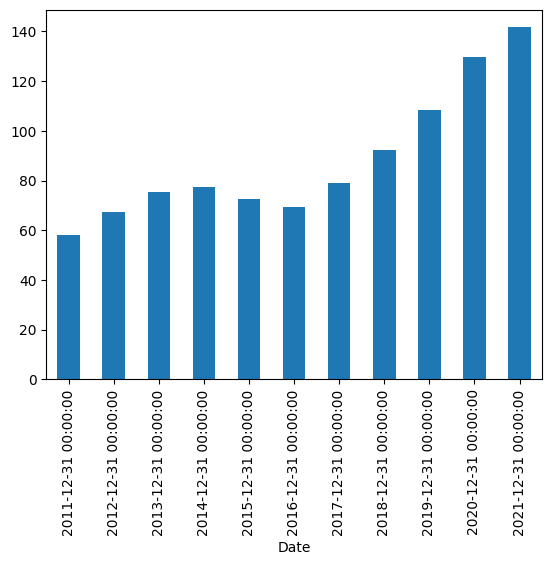

In [38]:
df['Close'].resample('YE').mean().plot(kind = 'bar')

# Time Shifting

In [78]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-16,57.099998,57.419998,56.639999,56.680000,44.899456,11780800
2011-11-17,56.540001,57.189999,56.259998,56.730000,44.939064,10223800
2011-11-18,57.029999,57.360001,56.610001,57.230000,45.335129,8982300
2011-11-21,56.930000,57.290001,56.380001,56.660000,44.883606,9932200
2011-11-22,56.560001,57.130001,56.500000,56.849998,45.034107,7497300


In [82]:
df.index

DatetimeIndex(['2011-11-16', '2011-11-17', '2011-11-18', '2011-11-21',
               '2011-11-22', '2011-11-23', '2011-11-25', '2011-11-28',
               '2011-11-29', '2011-11-30',
               ...
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-15'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [84]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-09,149.520004,149.869995,148.869995,149.789993,149.789993,5000600
2021-11-10,148.729996,149.619995,147.979996,148.440002,148.440002,5601200
2021-11-11,148.770004,148.990005,148.190002,148.500000,148.500000,4534400
2021-11-12,149.000000,149.240005,147.539993,147.759995,147.759995,6100800
2021-11-15,148.149994,148.449997,146.399994,146.910004,146.910004,9632000


In [96]:
# make all rows shift to the last day of the month.
# think as a group by, we are just reassigning index as per the rule which helps with the Analysis.

df.shift(periods=1).tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-09,150.220001,150.509995,148.729996,149.270004,149.270004,5124400.0
2021-11-10,149.520004,149.869995,148.869995,149.789993,149.789993,5000600.0
2021-11-11,148.729996,149.619995,147.979996,148.440002,148.440002,5601200.0
2021-11-12,148.770004,148.990005,148.190002,148.500000,148.500000,4534400.0
2021-11-15,149.000000,149.240005,147.539993,147.759995,147.759995,6100800.0


# Rolling and Expanding

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2011-11-16 to 2021-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


<Axes: xlabel='Date'>

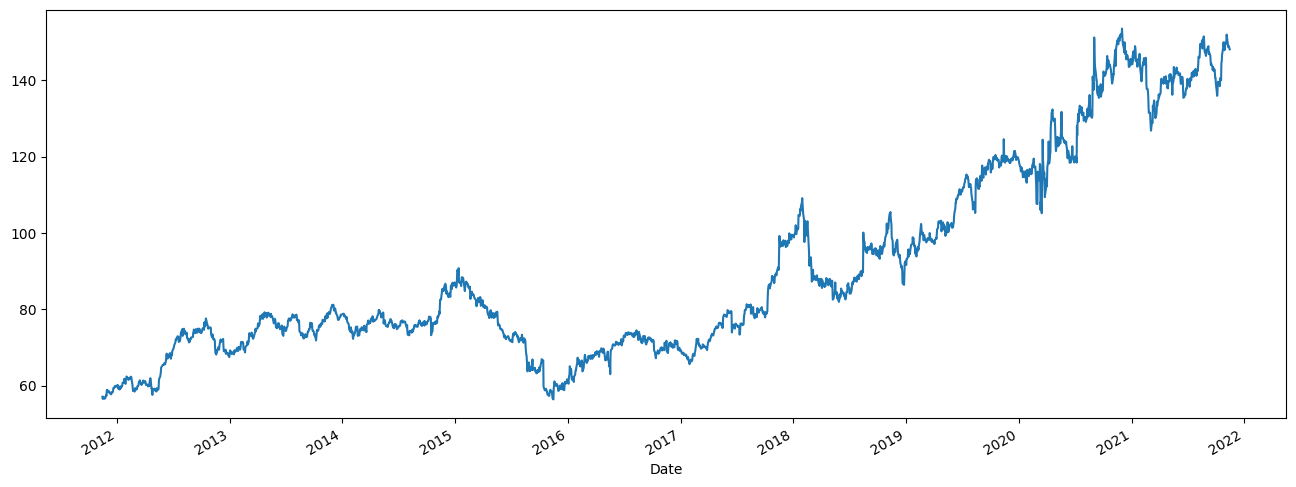

In [117]:
df['Open'].plot(figsize=(16,6))

<Axes: xlabel='Date'>

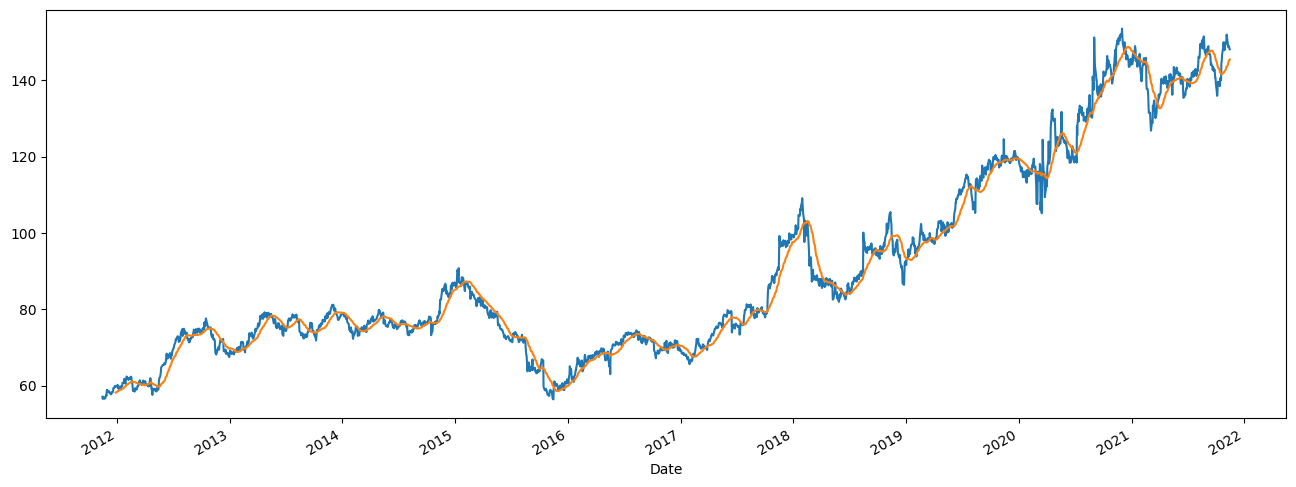

In [123]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

<Axes: xlabel='Date'>

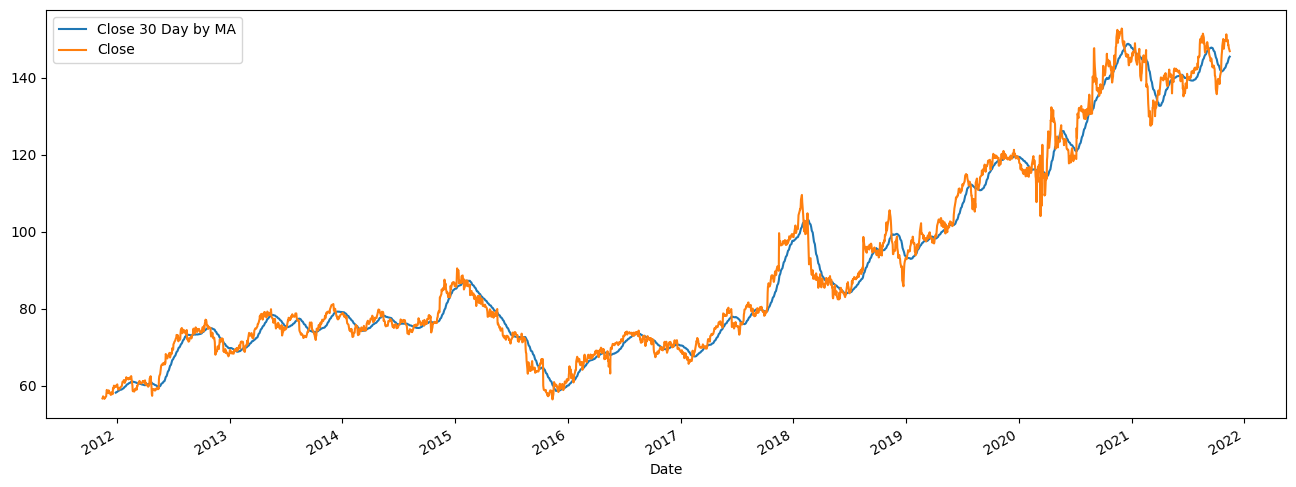

In [125]:
df['Close 30 Day by MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day by MA','Close']].plot(figsize=(16,6))

# Bollinger Bands

### Based on the standard deviation as the volatility decreases (narrow) or increases (widens).

<Axes: xlabel='Date'>

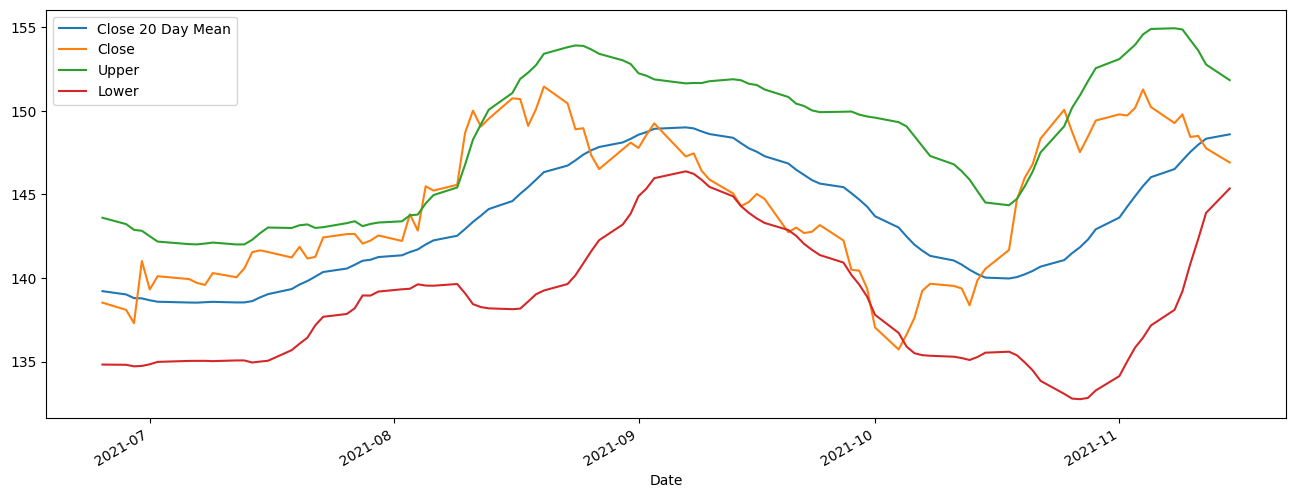

In [137]:

# Close 20 MA
df['Close 20 Day Mean'] = df['Close'].rolling(window=20).mean()

# Upper = 20 MA + 2*std(20)
df['Upper'] = df['Close 20 Day Mean'] + 2*(df['Close'].rolling(20).std())

# Lower = 20 MA - 2*std(20)
df['Lower'] = df['Close 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

# Close
df[['Close 20 Day Mean','Close','Upper','Lower']].tail(100).plot(figsize=(16,6))